In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

input1 = r"C:\Users\sonak\Desktop\뜸부기"
import os
print(os.listdir(input1))

from sklearn.datasets import make_regression
import gc
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn import datasets, linear_model
import statsmodels.api as sm

from warnings import filterwarnings
filterwarnings('ignore')

['.RData', '.Rhistory', 'example_zigbang.csv', 'example_zigbang_2.csv', 'ex_zigbang.R', 'ex_zigbang_2.R', 'ex_zigbang_3.R', 'ex_zigbang_4.R']


In [2]:
os.chdir(r"C:\Users\sonak\Desktop\뜸부기")
df = pd.read_csv('example_zigbang.csv', header='infer',encoding='latin1')

6

In [3]:
df.shape

(1601458, 25)

In [4]:
#결측치 확인
nas = df.isnull()
print(nas.sum(axis=0))

key                                       0
apartment_id                              0
city                                      0
transaction_year_month                    0
transaction_date                          0
year_of_completion                        0
exclusive_use_area                        0
floor                                     0
latitude                                  0
longitude                                 0
address_by_law                            0
total_parking_capacity_in_site        91813
total_household_count_in_sites            0
apartment_building_count_in_sites         0
tallest_building_in_sites                 9
lowest_building_in_sites                  9
heat_type                              2017
heat_fuel                              9667
room_id                                   0
supply_area                               0
total_household_count_of_area_type        0
room_count                              691
bathroom_count                  

In [5]:
df1 = df
df1.loc[(df1['total_parking_capacity_in_site'].isnull())] = df1['total_parking_capacity_in_site'].mean()

In [6]:
#선형회귀 모델 생성

model1 = linear_model.LinearRegression()
y = np.array(df1['total_parking_capacity_in_site'])
x =  np.array(df1["total_household_count_in_sites"])
# 형태를 맞춰줌
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [7]:
suma = model1.fit(x,y)
res = suma.predict(x)
res = res.reshape(-1,1)

In [8]:
len(res)

1601458

In [9]:
df = pd.read_csv('example_zigbang.csv', header='infer',encoding='latin1')

In [10]:
b = df[df['total_parking_capacity_in_site'].isnull()==True]

In [11]:
x.shape

(1601458, 1)

In [12]:
#결측치의 위치들
b = b.index 

In [13]:
len(b)

91813

In [14]:
# x의 형태를 변환해서 저장
final = x.reshape(-1)

In [16]:
x.shape

(1601458, 1)

In [17]:
# 원래 있던 'total_parking_capacity_in_site'를 제거하고 결측치에 예상값을 넣은 것을 대입해줌
df1 = df1.drop(['total_parking_capacity_in_site'],axis=1)

In [18]:
nas = df2.isnull()
print(nas.sum(axis = 0))
#df2는 결측치가 없는걸 확인함

total_parking_capacity_in_site    0
dtype: int64


In [19]:
# 그래프를 다시 합쳐준다
df2 = pd.DataFrame(data=final, columns=['total_parking_capacity_in_site'])
df1 = pd.merge(df1, df2, left_index=True, right_index=True)

In [20]:
df1.shape

(1601458, 25)

In [21]:
nas = df1.isnull()
print(nas.sum(axis=0))

key                                       0
apartment_id                              0
city                                      0
transaction_year_month                    0
transaction_date                          0
year_of_completion                        0
exclusive_use_area                        0
floor                                     0
latitude                                  0
longitude                                 0
address_by_law                            0
total_household_count_in_sites            0
apartment_building_count_in_sites         0
tallest_building_in_sites                 9
lowest_building_in_sites                  9
heat_type                              2009
heat_fuel                              9659
room_id                                   0
supply_area                               0
total_household_count_of_area_type        0
room_count                              682
bathroom_count                          682
front_door_structure            

In [22]:
dffinal = df1
# dffinal이게 최종 데이터니 건드리지 말자

In [23]:
df1.shape

(1601458, 25)

In [24]:
#df1의 결측치는 평균값으로 대체해준다.
df1.loc[(df1['room_count'].isnull())] = df1['room_count'].mean()

In [25]:
#선형회귀 모델 생성
# 전용면적과 공급면적을 x 값으로 가구수를 예측한다. 
model1 = linear_model.LinearRegression()
x = np.array(df1[['exclusive_use_area','supply_area']])
y =  np.array(df1["room_count"])
# 형태를 맞춰줌
x=x.reshape(-1,2)
y=y.reshape(-1,1)

In [26]:
suma = model1.fit(x,y)
res = suma.predict(x)
res = res.reshape(-1,1)

In [31]:
#ols 적용시
#model1 = linear_model.LinearRegression()
#x = df[['exclusive_use_area','supply_area']]
#y = df['room_count']
#x = sm.add_constant(x)
# ols모델 적용
#model = sm.OLS(y, x).fit() ## sm.OLS(output, input)
#predictions = model.predict(x)

In [28]:
b = df[df['room_count'].isnull()==True]

In [29]:
b = b.index

In [30]:
# 평균으로 채웠던 결측치를 선형회귀 모델을 통한 예측값으로 대체했다. 
y[b] = res[b]

In [31]:
df3 = pd.DataFrame(data=y, columns=['room_count'])
#df1 = pd.merge(df1, df2, left_index=True, right_index=True)

In [32]:
df3.shape

(1601458, 1)

In [33]:
#df3는 결측치가 없는것을 확인
nas = df3.isnull()
print(nas.sum(axis=0))

room_count    0
dtype: int64


In [34]:
df1 = df1.drop(['room_count'],axis=1)

In [35]:
df1 = pd.merge(df1, df3, left_index=True, right_index=True)

In [36]:
df1.columns

Index(['key', 'apartment_id', 'city', 'transaction_year_month',
       'transaction_date', 'year_of_completion', 'exclusive_use_area', 'floor',
       'latitude', 'longitude', 'address_by_law',
       'total_household_count_in_sites', 'apartment_building_count_in_sites',
       'tallest_building_in_sites', 'lowest_building_in_sites', 'heat_type',
       'heat_fuel', 'room_id', 'supply_area',
       'total_household_count_of_area_type', 'bathroom_count',
       'front_door_structure', 'transaction_real_price',
       'total_parking_capacity_in_site', 'room_count'],
      dtype='object')

In [37]:
nas = df1.isnull()
print(nas.sum(axis=0))

key                                       0
apartment_id                              0
city                                      0
transaction_year_month                    0
transaction_date                          0
year_of_completion                        0
exclusive_use_area                        0
floor                                     0
latitude                                  0
longitude                                 0
address_by_law                            0
total_household_count_in_sites            0
apartment_building_count_in_sites         0
tallest_building_in_sites                 9
lowest_building_in_sites                  9
heat_type                              2003
heat_fuel                              9653
room_id                                   0
supply_area                               0
total_household_count_of_area_type        0
bathroom_count                            0
front_door_structure                  13353
transaction_real_price          

In [38]:
dffinal = df1

In [39]:
# bathroom count의 결측치를 평균으로 일단 채워줌
df1.loc[(df1['bathroom_count'].isnull())] = df1['bathroom_count'].mean()

In [40]:
#선형회귀 모델 생성
# 전용면적, 공용면적, 방 갯수로 화장실의 갯수 예측
model1 = linear_model.LinearRegression()
x = np.array(df1[['exclusive_use_area','supply_area','room_count']])
y =  np.array(df1['bathroom_count'])
# 형태를 맞춰줌
x=x.reshape(-1,3)
y=y.reshape(-1,1)


In [41]:
suma = model1.fit(x,y)
res = suma.predict(x)
res = res.reshape(-1,1)

In [42]:
# 결측치를 채워주지 않은 df를 사용해 결측치의 위치를 확인
b = df[df['bathroom_count'].isnull()==True]

In [43]:
b = b.index

In [44]:
y[b] = res[b]

In [45]:
df3 = pd.DataFrame(data=y, columns=['bathroom_count'])

In [46]:
nas = df3.isnull()
print(nas.sum(axis=0))

bathroom_count    0
dtype: int64


In [47]:
df1 = df1.drop(['bathroom_count'],axis=1)

In [48]:
df1 = pd.merge(df1, df3, left_index=True, right_index=True)

In [49]:
dffinal = df1 #저장저장

In [50]:
# 결측치를 평균으로 줬다.
df1.loc[(df1['tallest_building_in_sites'].isnull())] = df1['tallest_building_in_sites'].mean()

In [51]:
# key 변수 제거(그냥 필요없어서 지움)
df1 = df1.drop(['key'],axis=1)

In [52]:
# city가 1인 서울만 사용한다. 
df1 = df1[df1['city'] == 1]

In [53]:
df1.shape

(957474, 24)

In [54]:
#2016년 이후 자료만 사용
df1 = df1[df1['transaction_year_month']>201600]

In [56]:
df1.shape
dffinal = df1

In [57]:
# dfyear를 앞에 4개를 연도로 뒤에 2개를 달로 사용한다. 
dfyear = []
for i in df1['transaction_year_month']:
    i = str(i)[:4]
    dfyear.append(int(i))
dfmonth = []
for i in df1['transaction_year_month']:
    i = str(i)[4:6]
    dfmonth.append(int(i))

In [58]:
df3 = pd.DataFrame(data=dfmonth, columns=['transaction_month'])

In [59]:
df4 = pd.DataFrame(data=dfyear, columns=['transaction_year'])

In [60]:
df3 = pd.merge(df3, df4, left_index=True, right_index=True)

In [61]:
# index가 같아야 merge가 가능해서 index를 맞춰줬다. 
df3.index = df1.index

In [62]:
len(df3)

288897

In [63]:
df4 = pd.merge(df1,df3,left_index=True, right_index=True )

In [64]:
df4.shape

(288897, 26)

In [65]:
dffinal1 = df4 #저장저장

In [66]:
# month 구간 재구성 해줌(1,2,3,4분기로 재구성)
df4['transaction_month'] = pd.qcut(df4['transaction_month'], 4, labels=[1, 2, 3, 4])

In [67]:
# old 값 바로 생성 pandas는 편리하다
df4['old'] = df4['transaction_year'] - df4['year_of_completion']

In [69]:
# transaction_date 구간 재구성 해줌
#df4['transaction_date'] = pd.qcut(df4['transaction_date'],3,labels=[5,15,25])

In [70]:
#y는 transaction_real_price의 log변환값
df4['y'] = np.log(df4['transaction_real_price'])

In [71]:
# area_ration 은 남는 사용면적을 제공 면적으로 나눈 값
df4['area_ration'] = df4['exclusive_use_area']/df4['supply_area']

In [72]:
# 총 주차면적을 총 집의 갯수로 나눠준 것을 parking_household로 사용
df4['parking_household'] = df4['total_parking_capacity_in_site']/df4['total_household_count_in_sites']

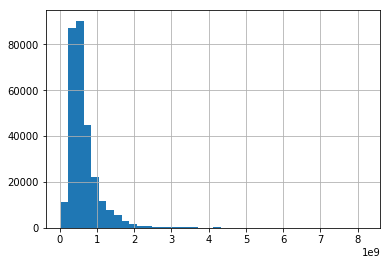

In [73]:
#실 거래가 그래프
hist = df4['transaction_real_price'].hist(bins=40)

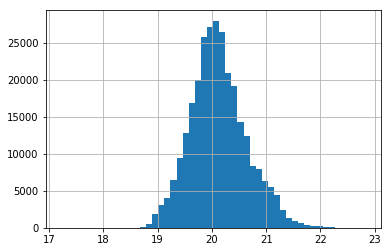

In [74]:
# breaks in r = bins in python
# y 는 transaction_real_price의 log 변환값
hist = df4['y'].hist(bins = 50)

In [75]:
# 많이 있는 아파트의 빈도수를 확인
tab = df4[df4.apartment_id>2000]

In [76]:
tab = tab.apartment_id

In [77]:
tab.value_counts

<bound method IndexOpsMixin.value_counts of 1182599    15492.0
1182600    15492.0
1182601     9174.0
1182602     9174.0
1182603     5584.0
1182604     2814.0
1182605     2814.0
1182606     5059.0
1182607     2816.0
1182608     5059.0
1182609    17011.0
1182610     6234.0
1182611     6234.0
1182612     5064.0
1182613     2815.0
1182614     2815.0
1182615     2770.0
1182616     2770.0
1182617     2770.0
1182619    19752.0
1182620     5394.0
1182621     5394.0
1182622    14250.0
1182623    14250.0
1182624    15803.0
1182625    19732.0
1182626    11887.0
1182627     5940.0
1182628     2812.0
1182629     2812.0
            ...   
1601369     9048.0
1601370     2761.0
1601372     2875.0
1601390     6492.0
1601391    12321.0
1601392    11149.0
1601393    18281.0
1601394    18281.0
1601396     8702.0
1601397     8702.0
1601398     8702.0
1601399     6492.0
1601400    17955.0
1601405    18112.0
1601406    18112.0
1601407     2925.0
1601408     2925.0
1601409    22069.0
1601410    22069.0
160141

In [78]:
dffinal2 = df4  # 저장저장

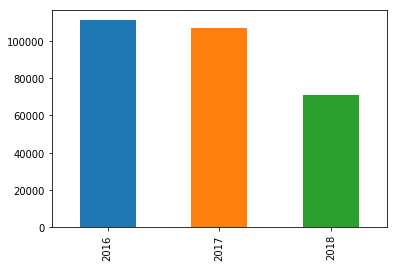

In [79]:
# 각 연도별로 지어진 아파트의 갯수
a = df4['transaction_year']
b = a.value_counts()
ax = b.plot.bar()

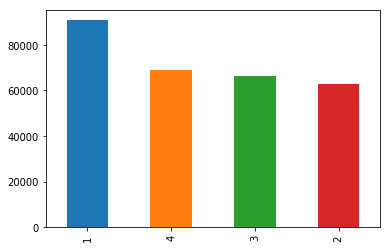

In [80]:
# 분기별 아파트 수
a = df4['transaction_month']
b = a.value_counts()
ax = b.plot.bar()

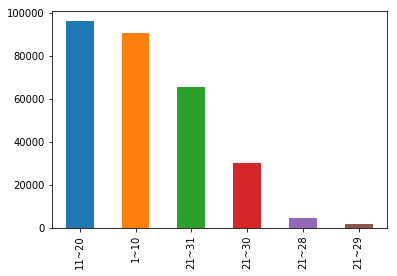

In [81]:
# 날짜별 아파트 수 5 = 1~10/ 15 = 10~20 / 25 = 20~30 
a = df4['transaction_date']
b = a.value_counts()
ax = b.plot.bar()

In [82]:
#agg를 사용해서 transaction_year별 transaction_real_price의 평균값을 구해줬다.
df4.groupby('transaction_year').agg({"transaction_real_price":['mean']})

,transaction_real_price
,mean
transaction_year,
2016,5.721261e+08
2017,6.615666e+08
2018,7.005770e+08


In [83]:
df4.groupby('transaction_month').agg({"transaction_real_price":['mean']})

,transaction_real_price
,mean
transaction_month,
1,6.115393e+08
2,6.226641e+08
3,6.575266e+08
4,6.630041e+08


In [84]:
df4.groupby('transaction_date').agg({"transaction_real_price":['mean']})

,transaction_real_price
,mean
transaction_date,
11~20,6.360052e+08
1~10,6.322061e+08
21~28,6.247247e+08
21~29,4.910536e+08
21~30,6.319098e+08
21~31,6.517875e+08


In [85]:
df4.groupby('old').agg({"transaction_real_price":['mean']})

,transaction_real_price
,mean
old,
0.0,7.214632e+08
1.0,9.069106e+08
2.0,8.741768e+08
3.0,8.117573e+08
4.0,7.597985e+08
5.0,8.399634e+08
6.0,7.613457e+08
7.0,7.799506e+08


In [162]:
#30만개로 그래프를 그려주기는 너무 많음으로 random한 값 1000개를 뽑아서 그래프를 그려주겠다.
b = df4.sample(n=1000,random_state = 123)
b = b.index

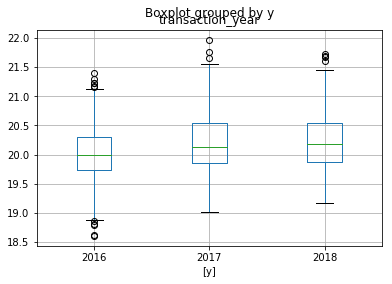

In [88]:
col = df4['y']
by = df4['transaction_year']
col1 = col[b]
col1 = np.array(col1)
by1 = by[b]
by1 = np.array(by1)
df3 = pd.DataFrame(data=by1, columns=['y'])
df4 = pd.DataFrame(data=col1, columns=['transaction_year'])
df3 = pd.merge(df3, df4, left_index=True, right_index=True)
df3.shape
# y는 거래가의 로그 변환값
boxplot = df3.boxplot(column=['transaction_year'],by = ['y'])

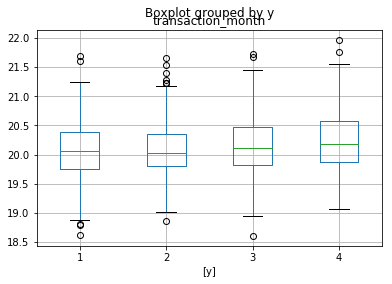

In [89]:
df4 = dffinal2
col = df4['y']
by = df4['transaction_month']
col1 = col[b]
col1 = np.array(col1)
by1 = by[b]
by1 = np.array(by1)
df3 = pd.DataFrame(data=by1, columns=['y'])
df4 = pd.DataFrame(data=col1, columns=['transaction_month'])
df3 = pd.merge(df3, df4, left_index=True, right_index=True)
df3.shape
# y는 거래가의 로그 변환값
boxplot = df3.boxplot(column=['transaction_month'],by = ['y'])

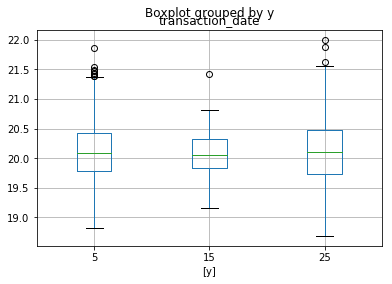

In [100]:
df4 = dffinal2
col = df4['y']
by = df4['transaction_date']
col1 = col[b]
col1 = np.array(col1)
by1 = by[b]
by1 = np.array(by1)
df3 = pd.DataFrame(data=by1, columns=['y'])
df4 = pd.DataFrame(data=col1, columns=['transaction_date'])
df3 = pd.merge(df3, df4, left_index=True, right_index=True)
df3.shape
# y는 거래가의 로그 변환값
boxplot = df3.boxplot(column=['transaction_date'],by = ['y'])

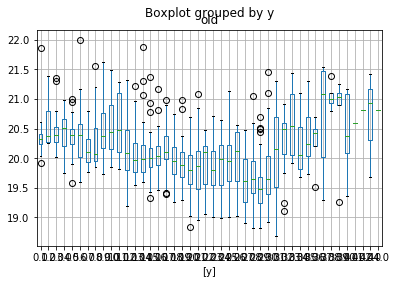

In [101]:
df4 = dffinal2
col = df4['y']
by = df4['old']
col1 = col[b]
col1 = np.array(col1)
by1 = by[b]
by1 = np.array(by1)
df3 = pd.DataFrame(data=by1, columns=['y'])
df4 = pd.DataFrame(data=col1, columns=['old'])
df3 = pd.merge(df3, df4, left_index=True, right_index=True)
df3.shape
# y는 거래가의 로그 변환값
boxplot = df3.boxplot(column=['old'],by = ['y'])

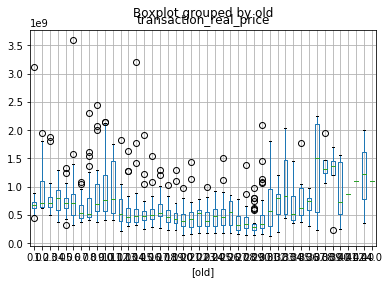

In [102]:
df4 = dffinal2
col = df4['transaction_real_price']
by = df4['old']
col1 = col[b]
col1 = np.array(col1)
by1 = by[b]
by1 = np.array(by1)
df3 = pd.DataFrame(data=by1, columns=['old'])
df4 = pd.DataFrame(data=col1, columns=['transaction_real_price'])
df3 = pd.merge(df3, df4, left_index=True, right_index=True)
df3.shape
# y는 거래가의 로그 변환값
boxplot = df3.boxplot(column=['transaction_real_price'],by = ['old'])

In [90]:
df4 = dffinal2

In [91]:
#건축년도에 따라 a,b,c로 레이블을 붙여줬다. 
df4['old'] = pd.qcut(df4['old'], 3, labels=['a','b','c'])

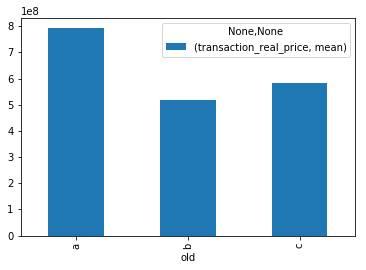

In [119]:
#건축 년도별 실거래가의 평균 비교
res1 = df4.groupby('old').agg({"transaction_real_price":['mean']})
ax = res1.plot.bar()

In [92]:
#old와 year_of_completion의 상관계수 확인 
y = df4['old']
df3 = pd.DataFrame(data=y, columns=['old'])
y = df4['year_of_completion']
df5 = pd.DataFrame(data=y, columns=['year_of_completion'])
df3 = pd.merge(df3,df5,left_index = True, right_index = True)
corr1 = df3.corr(method = 'pearson')
print(corr1)

                    year_of_completion
year_of_completion                 1.0


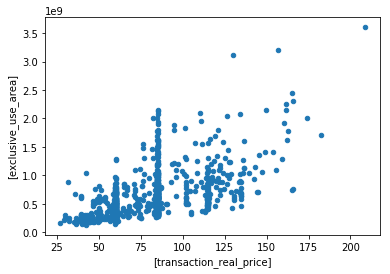

In [149]:
# 전용면적에 따른 실거래가 확인
df4 = dffinal3
col = df4['exclusive_use_area']
by = df4['transaction_real_price']
col1 = col[b]
col1 = np.array(col1)
by1 = by[b]
by1 = np.array(by1)
df3 = pd.DataFrame(data=by1, columns=['exclusive_use_area'])
df4 = pd.DataFrame(data=col1, columns=['transaction_real_price'])
df3 = pd.merge(df3, df4, left_index=True, right_index=True)
df3.shape
# y는 거래가의 로그 변환값
df3.plot.scatter(x=['transaction_real_price'],y = ['exclusive_use_area'])

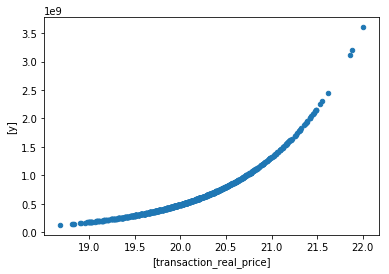

In [150]:
# 전용면적에 따른 실거래가 확인(실거래가를 log로 변환했을 때)
df4 = dffinal3
col = df4['y']
by = df4['transaction_real_price']
col1 = col[b]
col1 = np.array(col1)
by1 = by[b]
by1 = np.array(by1)
df3 = pd.DataFrame(data=by1, columns=['y'])
df4 = pd.DataFrame(data=col1, columns=['transaction_real_price'])
df3 = pd.merge(df3, df4, left_index=True, right_index=True)
df3.shape
# y는 거래가의 로그 변환값
df3.plot.scatter(x=['transaction_real_price'],y = ['y'])

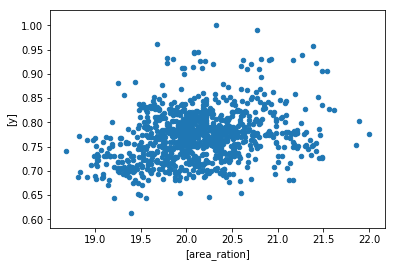

In [152]:
# 전용면적에 따른 실거래가 확인(실거래가를 log로 변환했을 때)
df4 = dffinal3
col = df4['y']
by = df4['area_ration']
col1 = col[b]
col1 = np.array(col1)
by1 = by[b]
by1 = np.array(by1)
df3 = pd.DataFrame(data=by1, columns=['y'])
df4 = pd.DataFrame(data=col1, columns=['area_ration'])
df3 = pd.merge(df3, df4, left_index=True, right_index=True)
df3.shape
# y는 거래가의 로그 변환값
df3.plot.scatter(x=['area_ration'],y = ['y'])

In [94]:
# room_count별 실거래가 평균
df4.groupby('room_count').agg({"transaction_real_price":['mean']})


,transaction_real_price
,mean
room_count,
0.0,6.631693e+08
1.0,3.185929e+08
2.0,3.950637e+08
3.0,6.155427e+08
4.0,9.057106e+08
5.0,1.813422e+09
6.0,2.780512e+09
7.0,4.107050e+09


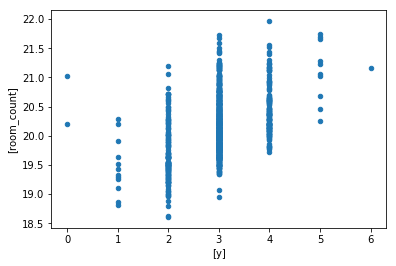

In [100]:
# 전용면적에 따른 실거래가 확인(실거래가를 log로 변환했을 때)
df4 = dffinal2
col = df4['room_count']
by = df4['y']
col1 = col[b]
col1 = np.array(col1)
by1 = by[b]
by1 = np.array(by1)
df3 = pd.DataFrame(data=by1, columns=['room_count'])
df4 = pd.DataFrame(data=col1, columns=['y'])
df3 = pd.merge(df3, df4, left_index=True, right_index=True)
df3.shape
# y는 거래가의 로그 변환값
df3.plot.scatter(x=['y'],y = ['room_count'])

In [181]:
df4 = dffinal1

In [183]:
df4.bathroom_count.unique()

array([2.0, 1.0, 3.0, 'a', 4.0, 5.0], dtype=object)

In [190]:

#30만개로 그래프를 그려주기는 너무 많음으로 random한 값 1000개를 뽑아서 그래프를 그려주겠다.
df4 = dffinal1
b = df4.sample(n=1000,random_state = 123)
b = b.index

In [188]:
#print(b)

Int64Index([131, 203,  50, 585, 138, 632, 328, 461, 924, 479,
            ...
            106, 595,  17, 742,  98, 988, 322, 382, 365, 510],
           dtype='int64', length=1000)


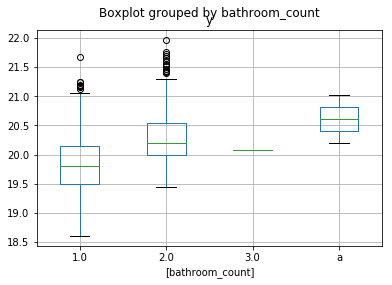

In [191]:
# 전용면적에 따른 실거래가 확인(실거래가를 log로 변환했을 때)
df4 = dffinal1
col = df4['bathroom_count']
by = df4['y']
col1 = col[b]
col1 = np.array(col1)
by1 = by[b]
by1 = np.array(by1)
df3 = pd.DataFrame(data=by1, columns=['y'])
df4 = pd.DataFrame(data=col1, columns=['bathroom_count'])
df3 = pd.merge(df3, df4, left_index=True, right_index=True)
df3.shape
# y는 거래가의 로그 변환값
df3.columns
boxplot = df3.boxplot(column=['y'],by = ['bathroom_count'])

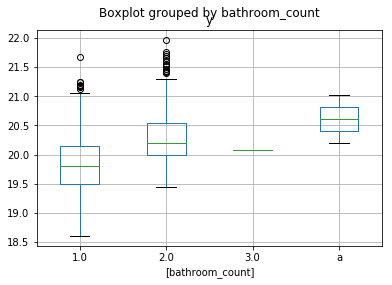

In [192]:
boxplot = df3.boxplot(column=['y'],by = ['bathroom_count'])

In [193]:
df3['bathroom_count'].unique()

array([1.0, 2.0, 'a', 3.0], dtype=object)

In [194]:
# 전용면적에 따른 실거래가 확인(실거래가를 log로 변환했을 때)
df4 = dffinal2
col = df4['parking_household']
by = df4['y']
col1 = col[b]
col1 = np.array(col1)
by1 = by[b]
by1 = np.array(by1)
df3 = pd.DataFrame(data=by1, columns=['y'])
df4 = pd.DataFrame(data=col1, columns=['parking_household'])
df3 = pd.merge(df3, df4, left_index=True, right_index=True)
df3.shape
# y는 거래가의 로그 변환값
df3.columns

Index(['y', 'parking_household'], dtype='object')

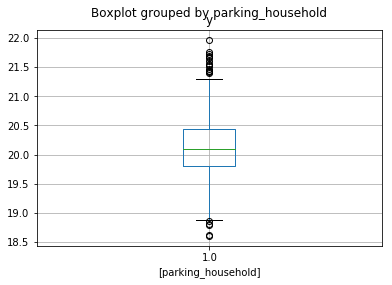

In [195]:
boxplot = df3.boxplot(column=['y'],by = ['parking_household'])

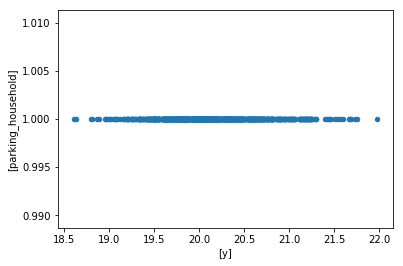

In [196]:
df3.plot.scatter(x=['y'],y = ['parking_household'])

In [302]:
df4 = dffinal2

In [304]:
df4 = df4[df4['floor'] != 'a']

In [305]:
df4['floor']=df4['floor'].astype(str).astype(float).abs()

In [306]:
df4.shape

(288089, 30)

In [217]:
df4.columns

Index(['apartment_id', 'city', 'transaction_year_month', 'transaction_date',
       'year_of_completion', 'exclusive_use_area', 'floor', 'latitude',
       'longitude', 'address_by_law', 'total_household_count_in_sites',
       'apartment_building_count_in_sites', 'tallest_building_in_sites',
       'lowest_building_in_sites', 'heat_type', 'heat_fuel', 'room_id',
       'supply_area', 'total_household_count_of_area_type',
       'front_door_structure', 'transaction_real_price',
       'total_parking_capacity_in_site', 'room_count', 'bathroom_count',
       'transaction_month', 'transaction_year', 'old', 'y', 'area_ration',
       'parking_household'],
      dtype='object')

In [227]:
xs_1 = ['transaction_year','transaction_month','exclusive_use_area']
xs_2 = ['total_parking_capacity_in_site','parking_household']
xs_3 = ['room_count','bathroom_count']
xs_4 = ['lowest_building_in_sites','supply_area']
xs_5 = ['old','floor']
xs_6 = ['address_by_law','heat_fuel','heat_type','front_door_structure']


In [252]:
xs_1 = ['address_by_law','heat_fuel','heat_type','front_door_structure','old','floor','lowest_building_in_sites','supply_area','room_count','bathroom_count','total_parking_capacity_in_site','parking_household','transaction_year','transaction_month','exclusive_use_area']
xs_2 = ['total_parking_capacity_in_site','parking_household']
xs_3 = ['room_count','bathroom_count']
xs_4 = ['lowest_building_in_sites','supply_area']
xs_5 = ['old','floor']
xs_6 = ['address_by_law','heat_fuel','heat_type','front_door_structure']


In [251]:
print(xs_7)

['transaction_year', 'transaction_month', 'exclusive_use_area', ['total_parking_capacity_in_site', 'parking_household'], ['room_count', 'bathroom_count'], ['lowest_building_in_sites', 'supply_area'], ['old', 'floor'], ['address_by_law', 'heat_fuel', 'heat_type', 'front_door_structure'], 'total_parking_capacity_in_site', 'parking_household', 'room_count', 'bathroom_count', 'lowest_building_in_sites', 'supply_area', 'old', 'floor', 'address_by_law', 'heat_fuel', 'heat_type', 'front_door_structure']


In [230]:
len(x_features)

15

In [235]:
xs_sum = ",".join(x_features)

(0, 31)

In [307]:
#선형회귀 모델 생성
# 전용면적, 공용면적, 방 갯수로 화장실의 갯수 예측
model1 = linear_model.LinearRegression()
x = np.array(df4[['floor','lowest_building_in_sites','supply_area','room_count','bathroom_count','total_parking_capacity_in_site','parking_household','transaction_year','transaction_month','exclusive_use_area']])
y = np.array(df4['y'])
# 형태를 맞춰줌
x=x.reshape(-1,10)
y=y.reshape(-1,1)

In [260]:
#선형회귀 모델 생성
# 전용면적, 공용면적, 방 갯수로 화장실의 갯수 예측
#model1 = linear_model.LinearRegression()
#x = df4[['address_by_law','heat_fuel','heat_type','front_door_structure','old','floor','lowest_building_in_sites','supply_area','room_count','bathroom_count','total_parking_capacity_in_site','parking_household','transaction_year','transaction_month','exclusive_use_area']]
#y = df4['y']
# 형태를 맞춰줌

In [308]:
suma = model1.fit(x,y)
y_hat = suma.predict(x)
y_hat = y_hat.reshape(-1,1)


In [309]:
y_hat = np.exp(y_hat)

In [310]:
y_hat = pd.DataFrame(data=y_hat, columns=['transaction_real_price_hat'])

In [311]:
df5 = df4

In [312]:
y_hat.index = df4.index

In [313]:
df4 = pd.merge(df4,y_hat,left_index= True, right_index = True)

In [315]:
df4.true_resid = df4.transaction_real_price - df4.transaction_real_price_hat

In [317]:
rmse = ((df4.transaction_real_price - df4.transaction_real_price_hat) ** 2).mean() ** .5

In [319]:
print(round(rmse/10**8,3))

3.068


In [321]:
dfhat = pd.DataFrame(data=df4.transaction_real_price_hat, columns=['transaction_real_price_hat'])

In [322]:
dfreal = pd.DataFrame(data=df4.transaction_real_price, columns=['transaction_real_price'])

In [323]:
df6 = pd.merge(dfhat,dfreal,left_index = True,right_index = True)

In [324]:
df6.shape

(288089, 2)

In [332]:
dfreal.corr(method = 'pearson')

""


In [329]:
print(dfreal)

        transaction_real_price
1182599               8.45e+08
1182600                  8e+08
1182601                  3e+08
1182602               2.61e+08
1182603               4.35e+08
1182604               5.48e+08
1182605               6.45e+08
1182606               3.03e+08
1182607               3.45e+08
1182608               3.08e+08
1182609               5.98e+08
1182610                6.4e+08
1182611                6.4e+08
1182612               2.88e+08
1182613              5.679e+08
1182614              5.699e+08
1182615                6.7e+08
1182616                  6e+08
1182617               4.17e+08
1182619               5.68e+08
1182620               5.63e+08
1182621               5.69e+08
1182622               6.15e+08
1182623               6.15e+08
1182624                6.8e+08
1182625                8.6e+08
1182626               1.29e+09
1182627               1.54e+09
1182628                5.8e+08
1182629                5.8e+08
...                        ...
1601389 

In [330]:
print(dfhat)

         transaction_real_price_hat
1182599                4.939340e+08
1182600                5.075300e+08
1182601                2.488636e+08
1182602                2.473986e+08
1182603                2.869988e+08
1182604                4.586842e+08
1182605                4.851469e+08
1182606                3.028009e+08
1182607                4.341334e+08
1182608                3.045940e+08
1182609                6.235743e+08
1182610                7.637172e+08
1182611                7.637172e+08
1182612                3.625727e+08
1182613                4.988130e+08
1182614                5.002877e+08
1182615                7.310688e+08
1182616                7.014701e+08
1182617                3.569681e+08
1182619                3.687111e+08
1182620                5.571544e+08
1182621                5.704692e+08
1182622                5.659269e+08
1182623                5.580680e+08
1182624                6.541559e+08
1182625                5.232973e+08
1182626                1.161